In [48]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [49]:
# Import Wildfire Data and Create Fire Dataframe
fire_df = pd.read_csv("FL2.csv")


In [50]:
# Convert Lat/Long to String
fire_df['Latitude'] = fire_df['Latitude'].astype('str')
fire_df['Longitude'] = fire_df['Longitude'].astype('str') 

In [51]:
# Check Data Types
fire_df.dtypes

Fire Year          int64
District          object
Unit              object
Fire Number       object
Fire Name         object
Legal             object
Latitude          object
Longitude         object
Fuel Model        object
County            object
Report Date       object
General Cause     object
ODF_Acres        float64
Total_Acres      float64
dtype: object

In [53]:
# Alt Function to convert DMS to Decimal

#def dms_to_dd(d, m, s):
    #dd = d + float(m)/60 + float(s)/3600
    #return dd

# Converting Lat/Long DMS to Decimal
pattern = r'(?P<d>[\d\.]+).*?(?P<m>[\d\.]+).*?(?P<s>[\d\.]+)'

#Lat
dms = fire_df['Latitude'].str.extract(pattern).astype(float)
fire_df['LATITUDE'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

#Long  
dms = fire_df['Longitude'].str.extract(pattern).astype(float)
fire_df['LONGITUDE'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Latitude,Longitude,Fuel Model,County,Report Date,General Cause,ODF_Acres,Total_Acres,LATITUDE,LONGITUDE
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,"45° 23' 19.92""","-123° 37' 2.27""",R,Tillamook,7/7/21 9:09,Recreationist,0.01,0.01,45.388867,123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,"45° 4' 21.7""","-123° 56' 52.4""",G,Tillamook,7/16/21 11:32,Equipment Use,0.10,0.10,45.072694,123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,"45° 42' 25.98""","-123° 39' 47.4""",K,Tillamook,7/31/21 17:19,Lightning,0.10,0.10,45.707217,123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,"45° 28' 35.4""","-123° 58' 7.68""",H,Tillamook,8/4/21 22:50,Recreationist,0.59,0.59,45.476500,123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,"45° 33' 59.21""","-123° 37' 39.6""",J,Tillamook,8/11/21 2:48,Under Invest,74.00,74.00,45.566447,123.627667


In [54]:
# Convert all Longtiude to Negative
fire_df['LONGITUDE'] *= -1

In [55]:
# Drop DMS Lat/Long
fire_df = fire_df.drop(['Latitude', 'Longitude', "ODF_Acres"], axis=1)
# Confirm Dropped Columns
fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667


In [10]:
#List all Columns
for col in fire_df.columns:
    print(col)

Fire Year
District
Unit
Fire Number
Fire Name
Legal
Fuel Model
County
Report Date
General Cause
Total_Acres
LATITUDE
LONGITUDE


In [56]:
# Import LE to convert Fuel Model and General Cause to Numeric Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting Fuel Model to Numeric
label_encoder = LabelEncoder()
fire_df["fueltype_num"] = label_encoder.fit_transform(fire_df["Fuel Model"])
fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE,fueltype_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7


In [57]:
# Converting General Cause to Numeric 
label_encoder = LabelEncoder()
fire_df["GeneralCause_num"] = label_encoder.fit_transform(fire_df["General Cause"])
fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE,fueltype_num,GeneralCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,7
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,7
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,9


In [58]:
# Drop the null columns where all values are null
fire_df = fire_df.dropna(axis='columns', how='all')

# Drop the null rows
fire_df = fire_df.dropna()
fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE,fueltype_num,GeneralCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,7
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,7
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,9


In [59]:
# Drop All Columns where Total Acres is less then 9
fire_df.drop(fire_df[fire_df.Total_Acres < 9].index, inplace=True)
fire_df.head(20)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE,fueltype_num,GeneralCause_num
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,9
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5
77,2021,55 - West Oregon,Dallas,30,Applegate,T7S R5W S31 NWNE,J,Polk,4/13/21 11:14,Debris Burning,9.10,44.925992,-123.342003,7,1
198,2019,53 - Forest Grove,Forest Grove,86,High Heaven Fire,T3S R5W S33 SESW,J,Yamhill,4/30/19 13:35,Debris Burning,24.00,45.261111,-123.310722,7,1
213,2019,55 - West Oregon,Toledo,24,Crystal Creek,T10S R9W S29 SWSE,F,Lincoln,3/19/19 12:03,Equipment Use,9.67,44.667300,-123.810631,3,2
221,2019,55 - West Oregon,Toledo,29,Trojan,T7S R9W S14 SENE,I,Lincoln,6/4/19 15:57,Equipment Use,108.00,44.965403,-123.750017,6,2
228,2019,58 - North Cascade,Molalla,5,Buckner Creek Rd,T4S R2E S12 SWSW,A,Clackamas,7/12/19 17:00,Equipment Use,9.20,45.230944,-122.514250,0,2
259,2019,58 - North Cascade,Santiam,71,Santiam Park,T9S R2E S22 NWSE,H,Marion,3/19/19 13:30,Debris Burning,184.42,44.770333,-122.557667,5,1
308,2019,71 - Southwest,Medford,107,East Evans,T34S R3W S24 NWSE,C,Jackson,8/2/19 13:55,Miscellaneous,155.00,42.600000,-123.003833,2,5
333,2019,71 - Southwest,Medford,233,Gyda Ln,T38S R3W S30 SWNE,C,Jackson,8/27/19 15:57,Equipment Use,54.00,42.240200,-123.099200,2,2


In [60]:
# Set and Classify Fire Sizes
fire_df.loc[fire_df['Total_Acres'] <= 10, 'fire_severity'] = 1
fire_df.loc[(fire_df['Total_Acres'] > 10) & (fire_df['Total_Acres'] <= 100), 'fire_severity'] = 2
fire_df.loc[fire_df['Total_Acres'] > 100, 'fire_severity'] = 3

In [61]:
fire_df.head(5)

,Fire Year,District,Unit,Fire Number,Fire Name,Legal,Fuel Model,County,Report Date,General Cause,Total_Acres,LATITUDE,LONGITUDE,fueltype_num,GeneralCause_num,fire_severity
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,9,2.0
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
77,2021,55 - West Oregon,Dallas,30,Applegate,T7S R5W S31 NWNE,J,Polk,4/13/21 11:14,Debris Burning,9.10,44.925992,-123.342003,7,1,1.0
198,2019,53 - Forest Grove,Forest Grove,86,High Heaven Fire,T3S R5W S33 SESW,J,Yamhill,4/30/19 13:35,Debris Burning,24.00,45.261111,-123.310722,7,1,2.0
213,2019,55 - West Oregon,Toledo,24,Crystal Creek,T10S R9W S29 SWSE,F,Lincoln,3/19/19 12:03,Equipment Use,9.67,44.667300,-123.810631,3,2,1.0


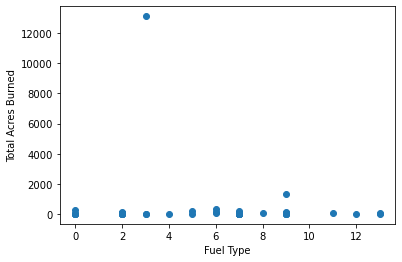

In [20]:
# Linear Regression ML Testing - Relationships
from sklearn.linear_model import LinearRegression
plt.scatter(fire_df.fueltype_num, fire_df.Total_Acres)
plt.xlabel('Fuel Type')
plt.ylabel('Total Acres Burned')
plt.show()

In [21]:
X = fire_df.fueltype_num.values.reshape(-1, 1)

In [22]:
X[:5]

array([[7],
       [9],
       [7],
       [7],
       [3]])

In [23]:
X.shape

(48, 1)

In [27]:
y = fire_df.Total_Acres

In [28]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(48,)


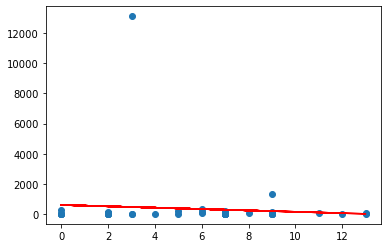

In [29]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [30]:
print(model.coef_)
print(model.intercept_)

[-45.23937299]
602.6627883754106


In [31]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [62]:
# Smote In Progress

from sklearn import linear_model, model_selection, metrics, random_projection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [63]:
label_severity = fire_df['fueltype_num']
train_cols = ['LATITUDE', 'LONGITUDE', 'County','fire_severity']
train_fire_df = fire_df[train_cols]

In [64]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(train_fire_df, label_severity, test_size= .25, stratify = label_severity)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.